# Interpolación

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Interpolación

*Interpolación* es el proceso de encontrar una expressión (en muchos casos un polinomio) con un conjunto de puntos $(x, y)$ que pasan por este polinomio.

### Ejemplo
Buscamos el polinomio
$$ p(x) = a_0 + a_1 x + a_2 x^2 $$
donde tengamos algunos puntos dados
$$ p(x_i) = y_i, \qquad i = 1, 2, 3 $$

In [2]:
from math import *
X1 = (0, pi/4, pi/2)
Y1 = (sin(0), sin(pi/4), sin(pi/2))
pd.DataFrame([X1, Y1], index=["x", "y"])

,0,1,2
x,0.0,0.785398,1.570796
y,0.0,0.707107,1.000000


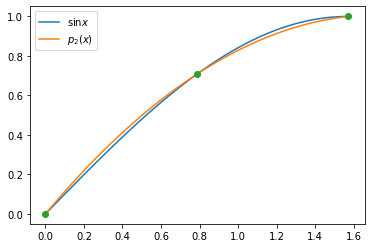

In [3]:
from sympy import *
from sympy.abc import x, epsilon, alpha

p1 = interpolating_poly(3, x, X1, Y1) #funcion de SymPy que interpola un polinomio
p1n = lambdify(x, p1) #lambdify=(args, expr) convertimos en simbolico una función numérica
#def p1n (f):
#    return numerico
x1r = np.linspace(0, 1.58)
plt.plot(x1r, np.sin(x1r), label = "$\sin x$")
plt.plot(x1r, p1n(x1r), label="$p_2(x)$")
plt.plot([N(x) for x in X1], [N(x) for x in Y1], 'o')
plt.legend();

## Propósitos de la interpolación

1. Reemplazar un conjunto de puntos ${(x_i, y_i)}$ por una función cerrada.
2. Aproximar una función por otra, más sencilla. Tipicamente se usan polinomios o polinomios a trozos (piecewise polinomials)

Propósito #1 tiene varios aspectos:

- Los datos pueden ser generadas por una clase de función específica. Por ejemplo:
  $$ p(x) = a_0 + a_1 e^x + a_2 e^{2x} + \dots + a_n e^{n x}$$
  En este caso hay que encontrar a los coeficientes ${a_j}$.

- Tenemos los valores de la función $f(x)$ tabulados. Queremos evaluar $f(x)$ para un $x$ desconocido.

  Por ejemplo. tenemos una tabla de logaritmos y queremos el logaritmo para un $x$ no en dado.
  
- Dado un conjunto de puntos ${(x_i, y_i)}$, queremos una curva que pasa por los puntos. Eso ocurre, por ejemplo, cuando gráficamos funciones. 
  Usar líneas rectas genera esquinas, nos gusta más tener una funciones diferenciable en todos los puntos.

El propósito #2 es aproximar una función $f(x)$ para una función más sencilla. Eso puede ayudar para encontrar la derivada o la integral de $f(x)$. 

Por ejemplo: la evaluación de
$$ I = \int_0^1 \frac{d x}{1 + x^{10}} $$
no es fácil en forma cerrada. Veremos como es posible resolverlo con la integración de polinomios interpolantes.

## Interpolación lineal

La forma más fácil de interpolar es usar una line recta, es decir, un polinomio del orden 1
$$ P_1(x) = a_0 + a_1 x $$
Es único, dado dos puntos $(x_0, y_0)$, $(x_1, y_1)$. Existen diferentes representaciones:
\begin{align}
P_1(x)
  &= \frac{x - x_1}{x_0 - x_1} y_0 + \frac{x - x_0}{x_1 - x_0} y_1 \\
  &= \frac{(x_1 - x) y_0 + (x - x_0) y_1}{x_1 - x_0} \\
  &= y_0 + \frac{x - x_0}{x_1 - x_0} [y_1 - y_0] \\
  &= y_0 + \frac{y_1 - y_0}{x_1 - x_0} (x - x_0) \\
\end{align}


In [4]:
#Antes, un poco sobre Zip

nombre = [ "Alan", "Elly", "Elias", "Jordan" ] 
semestre = [ 4, 1, 3, 2 ] 
edad = [ 18, 19, 20, 21 ] 
  
# using zip() to map values 
junto = zip(nombre, semestre, edad) 
  
# converting values to print as list 
junto = list(junto) 
  
print ("El resultado de zip es: ") 
print (junto) 
  
print("\n") 
  

El resultado de zip es: 
[('Alan', 4, 18), ('Elly', 1, 19), ('Elias', 3, 20), ('Jordan', 2, 21)]




### Ejemplo

Interpolación para $f(x) = \tan x$ para $x=1.15$.

In [5]:
import numpy as np
import pandas as pd
X2 = [1, 1.1, 1.2, 1.3]
Y2 = np.tan(X2)
Points2 = list(zip(X2, Y2)) 
#zip() the purpose of zip() is to map the similar index of multiple containers 
#so that they can be used just using as single entity.

tan = pd.DataFrame(Points2, columns=["$x$", r"$\tan x$"]).transpose()
tan

,0,1,2,3
$x$,1.000000,1.10000,1.200000,1.300000
$\tan x$,1.557408,1.96476,2.572152,3.602102


In [6]:
def lin_interp(x, p0, p1):
    x0, y0 = p0 #nodo cero
    x1, y1 = p1
    return y0 + (x - x0) / (x1 - x0) * (y1 - y0)

res = lin_interp(1.15, Points2[1], Points2[2])
"{:.4}, {:.4}, error = {:.4e}".format(res, np.tan(1.15), np.tan(1.15) - res)

'2.268, 2.234, error = -3.3959e-02'

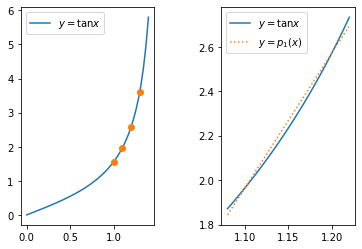

In [15]:
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.subplot(121)
ax=figsize=(20, 9)
xr = np.linspace(0, 1.4)
plt.plot(xr, np.tan(xr), label=r"$y = \tan x$")
plt.plot(X2, Y2, "o")
#ax1.set_title(r"$y = \tan x$")
plt.legend()

plt.subplot(122)
ax=figsize=(20, 9)
xr = np.linspace(1.08, 1.22)
plt.plot(xr, np.tan(xr), label=r"$y = \tan x$")
plt.plot(xr, lin_interp(xr, Points2[1], Points2[2]), ":", label=r"$y = p_1(x)$")
plt.legend()

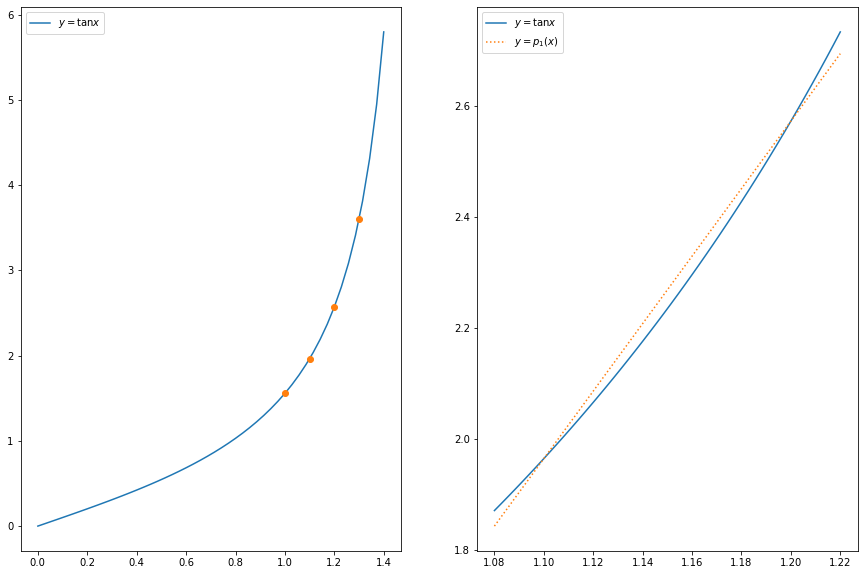

In [17]:
#Otra forma de que la gráfica quede mucho más bonita
#la r frente a una cadena de caracteres lo hace un raw string (literal). 

# creamo una figura completa (fig), que tendra 2 subfiguras ax1 y ax2 con la 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
xr = np.linspace(0, 1.4)
ax1.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax1.plot(X2, Y2, "o")
#ax1.set_title(r"$y = \tan x$")
ax1.legend()

xr = np.linspace(1.08, 1.22)
ax2.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax2.plot(xr, lin_interp(xr, Points2[1], Points2[2]), ":", label=r"$y = p_1(x)$")
ax2.legend()

## Interpolación cuadrática

Queremos encontrar el polinomio
$$ P_2(x) = a_0 + a_1 x + a_2 x^2 $$
con
$$ P(x_i) = y_i, \qquad i = 1, 2, 3 $$
para los puntos $(x_0, y_0)$, $(x_1, y_1)$, $(x_2, y_2)$. Una posibilidad es 
$$ P_2(x) = y_0 L_0(x) + y_1 L_1(x) + y_2 L_2(x) $$
con
$$ L_0 = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} $$
$$ 
  L_1 = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}, \qquad 
  L_2 = \frac{(x - x_1)(x - x_0)}{(x_2 - x_1)(x_2 - x_0)}
$$
Es la *forma de Lagrange* para el polinomio interpolante.

### Polinomios base de Lagrange

$$ L_0 = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} $$
$$ 
  L_1 = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}, \qquad 
  L_2 = \frac{(x - x_1)(x - x_0)}{(x_2 - x_1)(x_2 - x_0)}
$$
son los *polinomios base* de Lagrange para interpolación cuadratica. Tienen la propiedad
$$ L_i(x_j) = \begin{cases}
                1, \quad i = j\\
                0, \quad i \ne j\\
              \end{cases}
              \qquad i, j = 1, 2, 3
$$
Por construcción tienen grado 2. Como consecuencia, el polinomio interpolante
$$ P_2(x) = y_0 L_0(x) + y_1 L_1(x) + y_2 L_2(x) $$
debe tener grado $\le 2$.

### Solución única?

Suponemos que exista $Q(x)$ con $\mathrm{deg} (Q) \le 2$ y
$$ Q(x_i) = y_i, \qquad i=1, 2, 3 $$
Definimos
$$ R(x) = P_2(x) - Q(x) $$
que tiene que tener $\deg(R) \le 2$. Además
$$ R(x_i) = P_2(x_i) - Q(x_i) = y_i - y_i = 0 $$
El único polinomio de grado 2 con 3 ceros distintos es el cero-polinomio
$$ R(x) = 0 $$
Entonces tenemos 
$$ Q(x) = P_2(x) $$ **QED**

2.243450635651995 2.2344969487553255


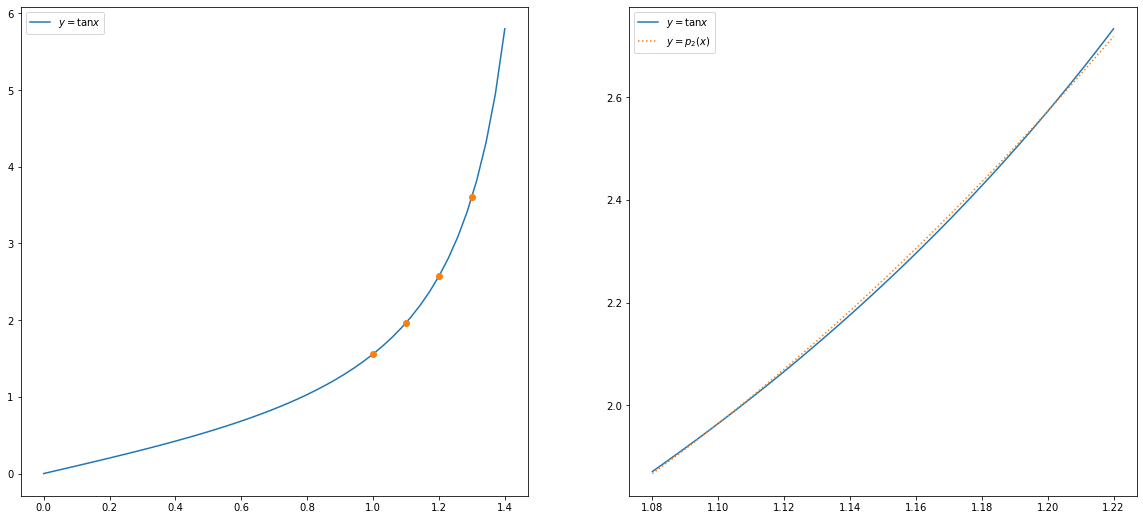

In [9]:
import numpy as np
import pandas as pd

def cua_interp(x, p0, p1,p2):
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    return y0*((x-x1)*(x-x2))/((x0-x1)*(x0-x2))+y1*((x-x0)*(x-x2))/((x1-x0)*(x1-x2))+y2*((x-x0)*(x-x1))/((x2-x0)*(x2-x1))


X2 = [1, 1.1, 1.2, 1.3]
Y2 = np.tan(X2)
Points2 = list(zip(X2, Y2)) 
res = cua_interp(1.15, Points2[1], Points2[2], Points2[0])
print(res,np.tan(1.15))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 9))
xr = np.linspace(0, 1.4)
ax1.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax1.plot(X2, Y2, "o")
#ax1.set_title(r"$y = \tan x$")
ax1.legend()

xr = np.linspace(1.08, 1.22)
ax2.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax2.plot(xr, cua_interp(xr, Points2[1], Points2[2], Points2[0]), ":", label=r"$y = p_2(x)$")
ax2.legend()

## Interpolación de orden más alto

Consideramos el caso de interpolación con un polinomio de orden $n$. Buscamos a un polinomio $P_n(x)$ con
$$ \deg(P_n) \leq n$$
$$ P_n(x_i) = y_i, \qquad i = 0, 1, \dots, n $$
con los puntos
$$ (x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)$$
La solución esta proporcionada por la *formula de Lagrange*
$$ P_n(x) = y_0 L_0(x) + y_1 L_1(x) + \dots + y_n L_n(x) $$
Los funciones base de Lagrange son
$$ L_k(x) = \frac{(x - x_0) \dots (x - x_{k-1})(x - x_{k+1}) \dots (x - x_n)}{(x_k - x_0) \dots (x_k - x_{k-1})(x - x_{k+1}) \dots (x_k - x_n)}$$
para $k = 1, 2, \dots, n$. 

Se puede demonstra de manera similar al caso cuadratico que $P_n(x)$ es solución única al problema de interpolación.

En la expresión
$$ L_k(x) = \frac{(x - x_0) \dots (x - x_{k-1})(x - x_{k+1}) \dots (x - x_n)}{(x_k - x_0) \dots (x_k - x_{k-1})(x - x_{k+1}) \dots (x_k - x_n)}$$
es claro que es polinomio de grado $n$. Adicionalmente
$$ L_k(x_j) = \begin{cases}
                1, \quad k = j\\
                0, \quad k \ne j\\
              \end{cases}
              \qquad k, j = 1, 2, \dots, n
$$
Con estas propriedades es fácil concluir que 
$$ P_n(x) = y_0 L_0(x) + y_1 L_1(x) + \dots + y_n L_n(x) $$
realmente cumple con 
$$ \deg(P_n) \leq n$$
$$ P_n(x_i) = y_i, \qquad i = 0, 1, \dots, n $$

In [10]:
tan

,0,1,2,3
$x$,1.000000,1.10000,1.200000,1.300000
$\tan x$,1.557408,1.96476,2.572152,3.602102


Lo interpolamos con los nodos $x_0=1.0$, $x_1=1.1$, $x_2=1.2$ y $x_3=1.3$.

Notamos que el error baja con el orden la interpolación, pero no muy rapidamente. El error crece otra vez cuando aumentamos puntos!

En general, la interpolación con un polinomio de orden alto y nodos $\{ x_i \}$ equidistantes y muy separados no tiene buen comportamiento numérico.

2.22954320885949 2.2344969487553255


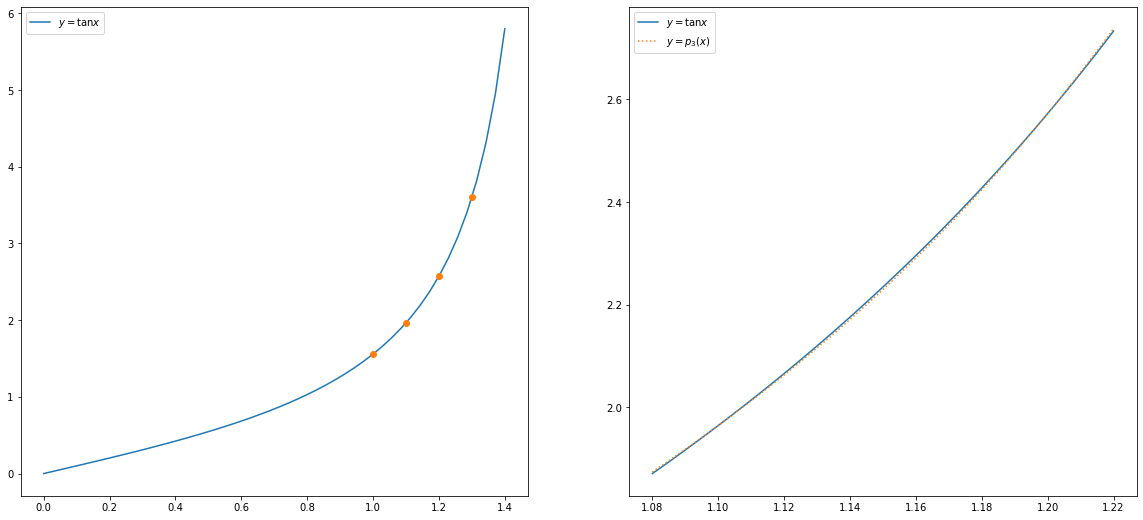

In [24]:
import numpy as np
import pandas as pd

def tercer_interp(x,p0,p1,p2,p3):
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    return y0*((x-x1)*(x-x2)*(x-x3))/((x0-x1)*(x0-x2)*(x0-x3))+y1*((x-x0)*(x-x2)*(x-x3))/((x1-x0)*(x1-x2)*(x1-x3))+y2*((x-x0)*(x-x1)*(x-x3))/((x2-x0)*(x2-x1)*(x2-x3))+ y3*((x-x0)*(x-x1)*(x-x2))/((x3-x0)*(x3-x1)*(x3-x2))


X2 = [1, 1.1, 1.2, 1.3]
Y2 = np.tan(X2)
Points2 = list(zip(X2, Y2)) 
res = tercer_interp(1.15, Points2[3], Points2[2], Points2[1],Points2[0])
print(res,np.tan(1.15))
"{:.4}, {:.4}, error = {:.4e}".format(res, np.tan(1.15), np.tan(1.15) - res)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 9))
xr = np.linspace(0, 1.4)
ax1.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax1.plot(X2, Y2, "o")
#ax1.set_title(r"$y = \tan x$")
ax1.legend()

xr = np.linspace(1.08, 1.22)
ax2.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax2.plot(xr, tercer_interp(xr, Points2[3], Points2[2], Points2[1],Points2[0]), ":", label=r"$y = p_3(x)$")
ax2.legend()

In [12]:
#Tu codigo de interpolacion de polinomio de grado n